## Task B: Finegrained

We use the finegrained task  here



In [1]:
%load_ext autoreload
%autoreload 2

from hatedetection import load_datasets
import glob
import json

train_dataset, dev_dataset, test_dataset = load_datasets(add_body=True)

INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


Obs

`text` hace referencia al contexto del tweet del diario
`title` al título de la noticia (extraído del artículo)

In [2]:


evaluations = {
}
for model_name, path in [
    ('none-ft', "../evaluations/betonews_fine_none.json"),   
    ('text-ft', "../evaluations/betonews_fine_text.json"),   
    ('body-ft', "../evaluations/betonews_fine_body.json"),   
    ]:

    with open(path) as f:
        evaluations[model_name] = json.load(f)

for key, evals in evaluations.items():
    print(f"We have {len(evals['metrics'])} {key} evaluations")


We have 10 none-ft evaluations
We have 10 text-ft evaluations
We have 15 body-ft evaluations


In [32]:
import numpy as np
from hatedetection import extended_hate_categories

df = test_dataset.to_pandas().set_index("id")
df["HATEFUL"] = df[extended_hate_categories].any(1)

column_names = [x+"_pred" for x in extended_hate_categories]

df[column_names] = (np.array(evaluations["text-ft"]["predictions"]) > 0).mean(0)
df["HATEFUL_pred"] = df[column_names].any(1)

df

,title,text,article_text,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,...,CALLS_pred,WOMEN_pred,LGBTI_pred,RACISM_pred,CLASS_pred,POLITICS_pred,DISABLED_pred,APPEARANCE_pred,CRIMINAL_pred,HATEFUL_pred
id,,,,,,,,,,,,,,,,,,,,,
397703,Mora Godoy cierra su escuela de tango y remata...,@usuario Ojalá se funda y cague de hambre,Mora Godoy cierra su escuela de tango y remata...,False,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,True,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,0,...,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,False,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,False,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,False,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361071,Nahir Galarza sumó a una abogada feminista a s...,@usuario Con esa varita q no rompe un plato ni...,Nahir Galarza sumó a una abogada feminista a s...,False,"La defensa de Nahir Galarza, condenada el 3 de...",0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
361072,Nahir Galarza sumó a una abogada feminista a s...,@usuario No las entiendo a estas pelotudas. So...,Nahir Galarza sumó a una abogada feminista a s...,True,"La defensa de Nahir Galarza, condenada el 3 de...",0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
361073,Nahir Galarza sumó a una abogada feminista a s...,@usuario Lo mató por qué es macho!,Nahir Galarza sumó a una abogada feminista a s...,False,"La defensa de Nahir Galarza, condenada el 3 de...",0,0,0,0,0,...,0.0,0.1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,True


## LGBTI

In [33]:
from sklearn.metrics import precision_recall_fscore_support

labels = df["LGBTI"]
preds = df["LGBTI_pred"] > 0.5

prec, recall, fscore, support = precision_recall_fscore_support(labels, preds, average='binary')

print("LGBTI results")
print(f"Precision: {prec:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1: {fscore:.3f}")
print(f"Support: {df['LGBTI'].sum()}")

LGBTI results
Precision: 0.667
Recall: 0.369
F1: 0.475
Support: 195


Hay un problema de recall, es decir, muchos falsos negativos

<AxesSubplot:>

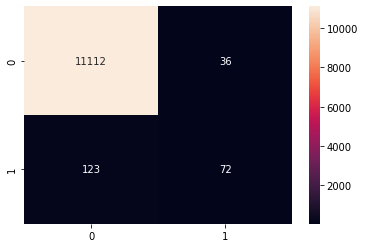

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(labels, preds), annot=True, fmt="d")

In [43]:
import pandas as pd

pd.options.display.max_rows = 150
pd.options.display.max_colwidth = 400
fn = df[labels & ~preds]

fn.loc[:, ["article_text", "text", "LGBTI_pred"]].sort_values("LGBTI_pred")

,article_text,text,LGBTI_pred
id,,,
379497,"""¿Por qué no vemos médicos trans?"": el reclamo de un prestigioso cardiólogo para que América sea más inclusiva | Por Valeria Román url",@usuario Es difícil ser médico con la cabeza quemada...,0.0
379540,"""¿Por qué no vemos médicos trans?"": el reclamo de un prestigioso cardiólogo para que América sea más inclusiva | Por Valeria Román url",@usuario Será porque le tienen miedo a la verdad de la biología???,0.0
379539,"""¿Por qué no vemos médicos trans?"": el reclamo de un prestigioso cardiólogo para que América sea más inclusiva | Por Valeria Román url",@usuario Porque no les da la cabeza para una carrera universitaria de complejidad,0.0
379538,"""¿Por qué no vemos médicos trans?"": el reclamo de un prestigioso cardiólogo para que América sea más inclusiva | Por Valeria Román url","@usuario Raro que no lleguen a ser médicos o ingenieros, son carreras duras y difíciles.\nPero nadie mejor que ellos sabe lo que es romperse el culo...",0.0
379536,"""¿Por qué no vemos médicos trans?"": el reclamo de un prestigioso cardiólogo para que América sea más inclusiva | Por Valeria Román url","@usuario Amigos es ciencia emoji cara pidiendo silencio emoji no vaya a ser que se vuelvan en contra de la ideología de género, verían la verdad emoji cara pidiendo silencio emoji",0.0
379526,"""¿Por qué no vemos médicos trans?"": el reclamo de un prestigioso cardiólogo para que América sea más inclusiva | Por Valeria Román url",@usuario Por que no estudian la carrera. Hasta ahora no esta prohibido estudiar para los trans,0.0
379525,"""¿Por qué no vemos médicos trans?"": el reclamo de un prestigioso cardiólogo para que América sea más inclusiva | Por Valeria Román url","@usuario ""Por qué no vemos médicos con enanismo? El reclamo de un pretencioso opa para que le aplaudan su postureo moral""",0.0
379524,"""¿Por qué no vemos médicos trans?"": el reclamo de un prestigioso cardiólogo para que América sea más inclusiva | Por Valeria Román url",@usuario El único que conocí era un desastre.,0.0
396734,"""Te amo "". La emotiva dedicatoria de Luis Novaresio a su pareja en su cumpleaños url url",@usuario Sigo sin entender esta obsesión por mostrar a quién se garchan. A nadie le importa. Son peores que las minas más egocéntricas.,0.0


## Falsos negativos LGBTI

|   Contexto                      |  Comentario                                           |
|---------------------------------|-------------------------------------------------------|
| Contó que era lesbiana, su papá le confesó que era gay y ahora su madre se enamoró de una mujer, lo que inspiró su segundo film | WTF. Mucho ESI los degeneró... |
|            | @usuario Esta familia tiene los genes alterados |
|  Oscar González Oro ya está instalado en el Uruguay: "Recuperé mi libertad" | Ahora quedate allá, y hablá mal d Macri d nuevo pa tener rating. Y opiná q los taxi boy uruguayos son mas educados q los escorts argentinos! Ano abierto! |
|¿Por qué un beso entre dos hombres los vuelve tan violentos?": la vida después de haber sido víctima de ataques  homofóbicos |  Será xq va contra la naturaleza de la raza... |
| "¿Por qué no vemos médicos trans?": el reclamo de un prestigioso cardiólogo para que América sea más inclusiva | 	@usuario Es difícil ser médico con la cabeza quemada...|
| | porque un enfermo no cura a otro enfermo |
| "Te amo ". La emotiva dedicatoria de Luis Novaresio a su pareja en su cumpleaños | 🤮🤮🤮|
|                              | @usuario Para la putarracada gastan líneas? |
|Elizabeth Gómez Alcorta: "Por la pandemia, vamos a tener una suba de los femicidios y travesticidios" |  Travesticidios... Osea asesinatos de tipos con peluca y tetas |
| Mariana Genesio Peña pasa su cuarentena total con guantes, barbijo y desnuda: "Mi cuerpo es el planeta Tierra" | Coronavirus nivel pelotudo en bolas	|
| | Con 3 piernas cualquiera es feliz!!!	|
| | pasa la cuarentena rascándose las bolas |